In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import keras.backend as K

from keras.models import Sequential, load_model  
from keras.layers.core import Dense, Activation  
from keras.layers import LSTM, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Input,Dense, LSTM,TimeDistributed, Flatten, Reshape
from keras.models import Model
from keras.preprocessing import sequence
from keras.optimizers import Nadam
from keras import optimizers
from keras.layers.normalization import BatchNormalization

%matplotlib inline

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Date Preprocessing
### Data files can be downloaded from [here](https://drive.google.com/drive/folders/1Ygpg6PwQ9KiXTlbuUBQQffuqpjrBx97G?usp=sharing)

In [2]:
X_training = pickle.load(open("X_train.pickle","rb"))
Y_training = pickle.load(open("Y_train.pickle","rb"))
X_testing = pickle.load(open("X_test.pickle","rb"))
Y_testing = pickle.load(open("Y_test.pickle","rb"))

X_training_un = pickle.load(open("X_train_un.pickle","rb"))
Y_training_un = pickle.load(open("Y_train_un.pickle","rb"))
X_testing_un = pickle.load(open("X_test_un.pickle","rb"))
Y_testing_un = pickle.load(open("Y_test_un.pickle","rb"))

X_training = np.concatenate((X_training, X_training_un), axis=0)
Y_training = np.concatenate((Y_training, Y_training_un), axis=0)
X_testing = np.concatenate((X_testing, X_testing_un), axis=0)
Y_testing = np.concatenate((Y_testing, Y_testing_un), axis=0)

# Centering and Normalizing data
mux = np.mean(X_training, axis=0)
stdx = np.std(X_training, axis=0)
X_training = (X_training - mux)/stdx
X_testing = (X_testing - mux)/stdx

In [23]:
def get_model(data_dim = 50):
    input_layer = Input(shape=(data_dim,))
    hidden_layer1 = Dense(256, activation="tanh", name="hidden_layer1")(input_layer)
    batch_norm1 = BatchNormalization( name = "batch_norm_1")(hidden_layer1)
    drop1 = Dropout(0.30)(batch_norm1)
    
    hidden_layer2 = Dense(128, activation="relu", name="hidden_layer2")(drop1)
    batch_norm2 = BatchNormalization( name = "batch_norm_2")(hidden_layer2)
    drop2 = Dropout(0.30)(batch_norm2)
    
    hidden_layer3 = Dense(64, activation="relu", name="hidden_layer3")(drop2)
    batch_norm3 = BatchNormalization( name = "batch_norm_3")(hidden_layer3)
    drop3 = Dropout(0.30)(batch_norm3)
    
    output_layer = Dense(1, activation="linear")(drop3)
    model = Model(inputs = input_layer, output = output_layer)
    
    return model

## Training

In [5]:
n_epochs = 500
data_dim = X_training.shape[1]
optimizer = optimizers.RMSprop(lr=1e-5)#, beta_1=0.9, beta_2=0.999, epsilon=1e-08)#, schedule_decay=0.004)
model = get_model(data_dim)
model.compile(loss="mean_squared_error", optimizer=optimizer)

batch_size = 20
L=len(X_training)
val_data = (X_testing, Y_testing)
model.fit(X_training, Y_training, batch_size=batch_size, epochs=n_epochs, validation_data=val_data)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Train on 1890 samples, validate on 810 samples
Epoch 1/500
1890/1890 [==============================] - 1s 553us/step - loss: 28.0045 - val_loss: 25.6879
Epoch 2/500
1890/1890 [==============================] - 0s 220us/step - loss: 27.7086 - val_loss: 25.5385
Epoch 3/500
1890/1890 [==============================] - 0s 226us/step - loss: 27.6336 - val_loss: 25.3355
Epoch 4/500
1890/1890 [==============================] - 0s 229us/step - loss: 27.3931 - val_loss: 25.3153
Epoch 5/500
1890/1890 [==============================] - 0s 226us/step - loss: 27.1500 - val_loss: 25.1350
Epoch 6/500
1890/1890 [==============================] - 0s 225us/step - loss: 27.3107 - val_loss: 24.8844
Epoch 7/500
1890/1890 [==============================] - 0s 227us/step - loss: 27.0457 - val_loss: 24.9736
Epoch 8/500
1890/1890 [==============================] - 0s 226us/step - loss: 26.9784 - val_loss: 24.8005
Epoch 9/500
1890/1890 [==============================] - 0s 224us/step - loss: 26.9791 - val_loss

1890/1890 [==============================] - 0s 209us/step - loss: 13.2589 - val_loss: 11.5832
Epoch 152/500
1890/1890 [==============================] - 0s 204us/step - loss: 13.0816 - val_loss: 11.4311
Epoch 153/500
1890/1890 [==============================] - 0s 206us/step - loss: 13.0373 - val_loss: 11.4155
Epoch 154/500
1890/1890 [==============================] - 0s 205us/step - loss: 12.9115 - val_loss: 11.2177
Epoch 155/500
1890/1890 [==============================] - 0s 204us/step - loss: 12.8295 - val_loss: 11.1527
Epoch 156/500
1890/1890 [==============================] - 0s 200us/step - loss: 12.7158 - val_loss: 11.0973
Epoch 157/500
1890/1890 [==============================] - 0s 205us/step - loss: 12.5353 - val_loss: 10.8253
Epoch 158/500
1890/1890 [==============================] - 0s 203us/step - loss: 12.4592 - val_loss: 10.7411
Epoch 159/500
1890/1890 [==============================] - 0s 211us/step - loss: 12.9051 - val_loss: 10.6187
Epoch 160/500
1890/1890 [========

1890/1890 [==============================] - 0s 202us/step - loss: 2.9485 - val_loss: 0.9315
Epoch 304/500
1890/1890 [==============================] - 0s 207us/step - loss: 2.9228 - val_loss: 0.9232
Epoch 305/500
1890/1890 [==============================] - 0s 202us/step - loss: 2.9270 - val_loss: 0.8850
Epoch 306/500
1890/1890 [==============================] - 0s 203us/step - loss: 2.7463 - val_loss: 0.8665
Epoch 307/500
1890/1890 [==============================] - 0s 201us/step - loss: 3.0151 - val_loss: 0.8476
Epoch 308/500
1890/1890 [==============================] - 0s 202us/step - loss: 2.6642 - val_loss: 0.8300
Epoch 309/500
1890/1890 [==============================] - 0s 214us/step - loss: 2.7447 - val_loss: 0.8080
Epoch 310/500
1890/1890 [==============================] - 0s 213us/step - loss: 2.7792 - val_loss: 0.7935
Epoch 311/500
1890/1890 [==============================] - 0s 215us/step - loss: 2.7026 - val_loss: 0.7739
Epoch 312/500
1890/1890 [==========================

1890/1890 [==============================] - 0s 208us/step - loss: 1.9746 - val_loss: 0.4015
Epoch 456/500
1890/1890 [==============================] - 0s 259us/step - loss: 1.9978 - val_loss: 0.4007
Epoch 457/500
1890/1890 [==============================] - 0s 221us/step - loss: 1.8417 - val_loss: 0.3991
Epoch 458/500
1890/1890 [==============================] - 0s 225us/step - loss: 1.9016 - val_loss: 0.3979
Epoch 459/500
1890/1890 [==============================] - 0s 232us/step - loss: 1.9438 - val_loss: 0.3983
Epoch 460/500
1890/1890 [==============================] - 0s 235us/step - loss: 1.9945 - val_loss: 0.4034
Epoch 461/500
1890/1890 [==============================] - 0s 233us/step - loss: 1.9218 - val_loss: 0.3975
Epoch 462/500
1890/1890 [==============================] - 0s 239us/step - loss: 1.9255 - val_loss: 0.3926
Epoch 463/500
1890/1890 [==============================] - 0s 226us/step - loss: 1.8847 - val_loss: 0.3987
Epoch 464/500
1890/1890 [==========================

## Testing

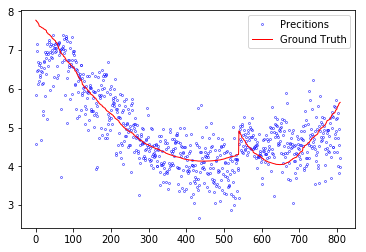

In [91]:
preds = model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

In [6]:
# # Save model
# model.save('model_mlp.h5')

# # Load saved model
# model = load_model('model_mlp.h5')

## Visualizing Activations

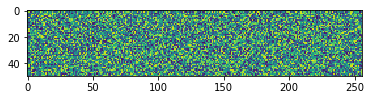

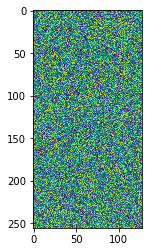

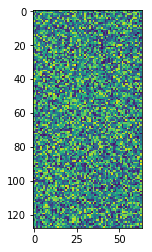

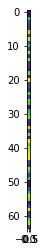

In [87]:
weights = model.get_weights()
k=0
for i in range(len(weights)):
    shape = weights[i].shape
    if(len(shape)>1):
        fileName = "mlp_weights_layer_{}.png".format(k)
        plt.figure()
        plt.imshow(weights[i])
        plt.savefig(fileName)
plt.show()

## Visualizing Activations

In [37]:
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    activations = []
    inp = model.input
    
    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)

    return activations

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


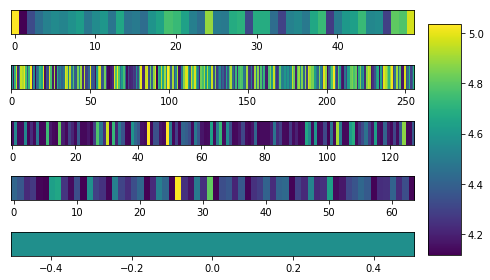

In [88]:
test_sample_num = 0
activation_map = get_activations(model, np.reshape(X_testing[test_sample_num,:], (1, X_testing.shape[1])))
layers = [0, 3, 6, 9, 10]

for key, layer in enumerate(layers):
    
    activations = activation_map[layer][0]
    subplot_num = len(layers)*100 + 1*10 + key+1
    plt.subplot(subplot_num)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(np.reshape(activations, (1, len(activations))), interpolation = 'nearest', aspect='auto')
cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.tight_layout()
plt.colorbar(cax=cax)
plt.show()